In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('mobile phone price prediction.csv')
print(df.head())

   Unnamed: 0                                  Name  Rating  Spec_score  \
0           0                 Samsung Galaxy F14 5G    4.65          68   
1           1                    Samsung Galaxy A11    4.20          63   
2           2                    Samsung Galaxy A13    4.30          75   
3           3                    Samsung Galaxy F23    4.10          73   
4           4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2 MP Dual Rear &a

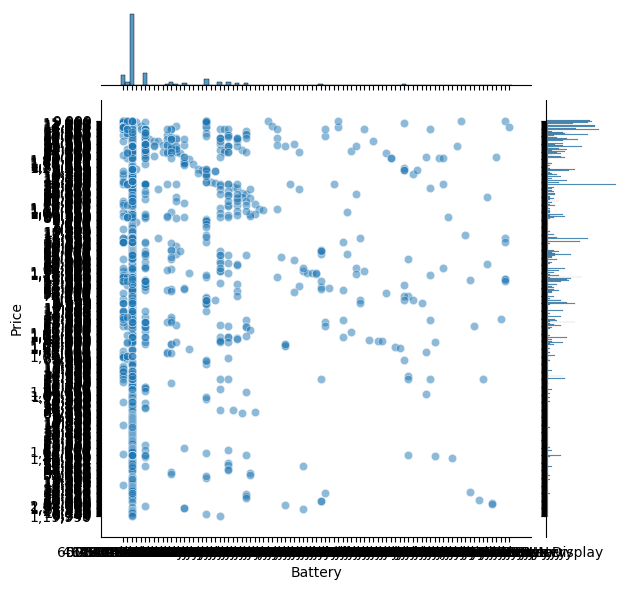

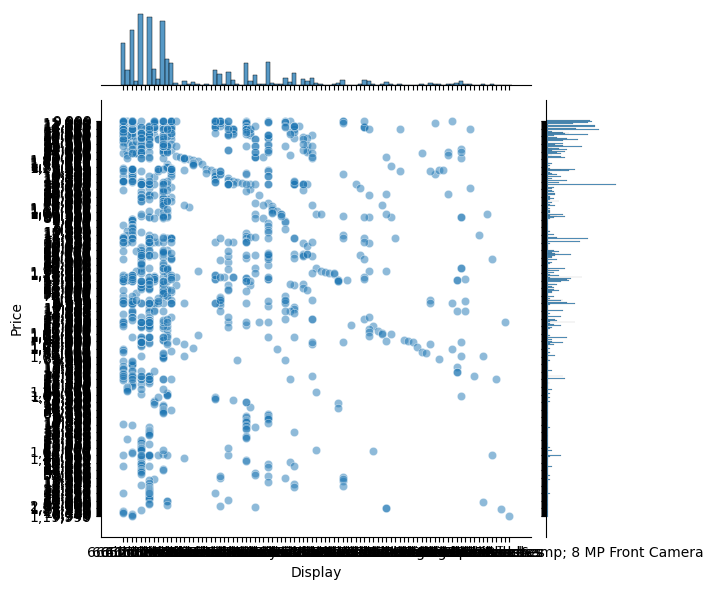

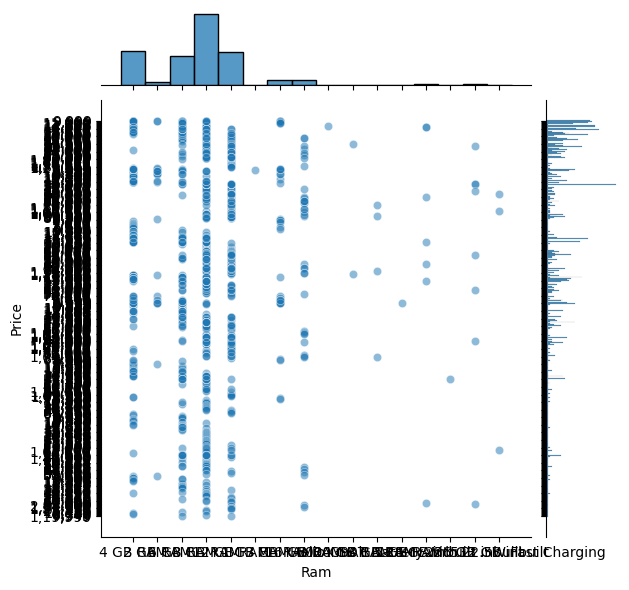

In [12]:
sns.jointplot(x='Battery',y='Price',data=df,alpha=0.5)
sns.jointplot(x='Display',y='Price',data=df,alpha=0.5)
sns.jointplot(x='Ram',y='Price',data=df,alpha=0.5)

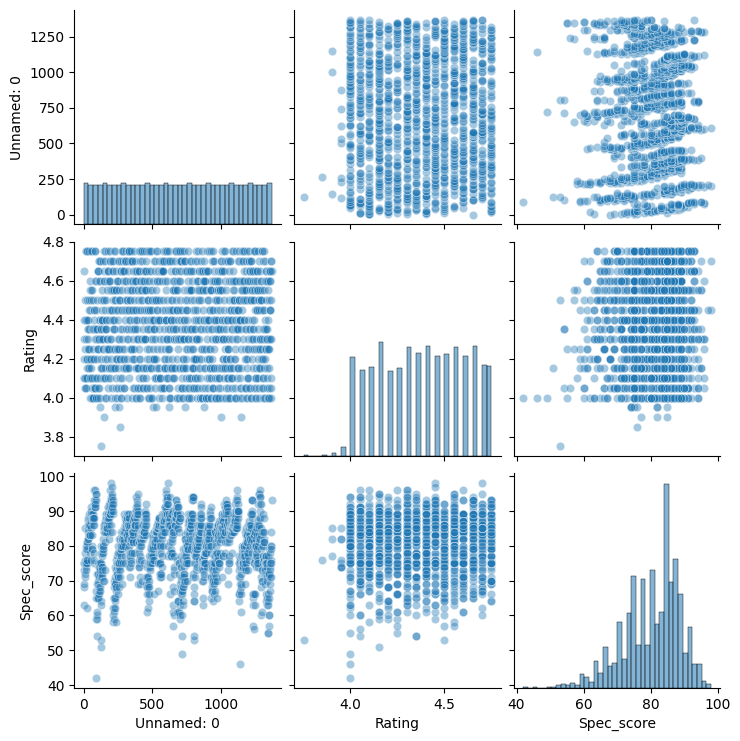

In [13]:
sns.pairplot(df,kind='scatter',plot_kws={'alpha':0.4},diag_kws={'alpha':0.55,'bins':40})

In [17]:
from sklearn.model_selection import train_test_split

In [71]:
x=df[['Rating','Android_version','Battery','Ram']]
y=df['Price']

In [72]:
x.head()

,Rating,Android_version,Battery,Ram
0,4.65,13,6000 mAh Battery,4 GB RAM
1,4.20,10,4000 mAh Battery,2 GB RAM
2,4.30,12,5000 mAh Battery,4 GB RAM
3,4.10,12,6000 mAh Battery,4 GB RAM
4,4.10,11,5000 mAh Battery,4 GB RAM


In [73]:
y.head()

0     9,999
1     9,990
2    11,999
3    11,999
4    11,999
Name: Price, dtype: object

In [74]:
print(len(x))

1370


In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [76]:
print(x_train.shape)

(959, 4)


In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()

In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
if not pd.api.types.is_numeric_dtype(y):
    y = y.str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float
else:
    print("y is already numeric. No conversion needed.")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
non_numeric_cols = x_train.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in x_train:", non_numeric_cols)
x_train = x_train.select_dtypes(include=['number'])
x_test = x_test.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy='most_frequent')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)
lr = LinearRegression()
lr.fit(x_train, y_train)

y is already numeric. No conversion needed.
Non-numeric columns in x_train: Index(['Android_version', 'Battery', 'Ram'], dtype='object')


LinearRegression()

In [83]:
lr.coef_

array([1339.53849171])

In [84]:
y_pred=lr.predict(x_test)

In [85]:
print(y_test)

427     28999.0
1088    30999.0
668     72999.0
572     27990.0
115     11990.0
         ...   
882     12999.0
1211    22499.0
333     14990.0
636     59990.0
930      6999.0
Name: Price, Length: 411, dtype: float64


In [86]:
print(y_pred)

[34081.53821467 33344.79204423 34014.56129008 34014.56129008
 33612.69974257 33746.65359174 33947.5843655  33679.67666715
 33612.69974257 33813.63051633 33210.83819506 33210.83819506
 33277.81511964 33478.7458934  33679.67666715 33813.63051633
 33545.72281798 33210.83819506 34148.51513925 33545.72281798
 33880.60744091 33210.83819506 33344.79204423 33478.7458934
 33545.72281798 33880.60744091 33679.67666715 33478.7458934
 33344.79204423 33679.67666715 33478.7458934  33746.65359174
 33746.65359174 33210.83819506 33612.69974257 33545.72281798
 33746.65359174 34148.51513925 34081.53821467 33478.7458934
 33746.65359174 33344.79204423 33277.81511964 33411.76896881
 33545.72281798 33880.60744091 33746.65359174 34148.51513925
 33612.69974257 33344.79204423 33210.83819506 33947.5843655
 33880.60744091 33612.69974257 33210.83819506 33947.5843655
 34081.53821467 34014.56129008 33679.67666715 33880.60744091
 34014.56129008 33344.79204423 33947.5843655  33612.69974257
 33411.76896881 34014.5612900

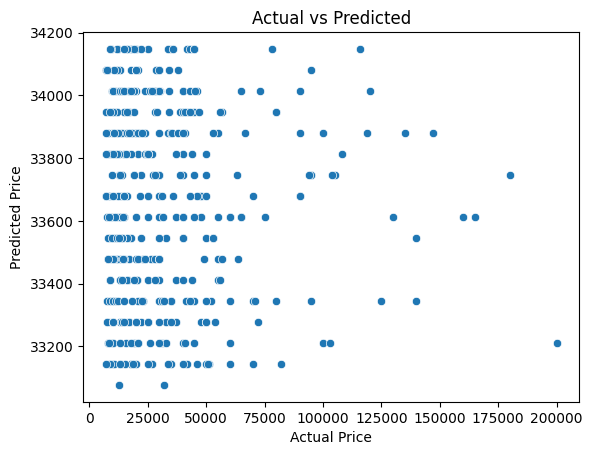

In [87]:
sns.scatterplot(x=y_test,y=y_pred)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Actual vs Predicted')
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [89]:
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean squared error:',math.sqrt(mean_squared_error(y_test,y_pred)))

mean absolute error: 20707.940528444007
mean squared error: 868984405.365128
root mean squared error: 29478.541438903114


In [90]:
residual=y_test-y_pred
print(residual)

427     -5082.538215
1088    -2345.792044
668     38984.438710
572     -6024.561290
115    -21622.699743
            ...     
882    -20211.838195
1211   -11381.607441
333    -19158.515139
636     26645.207956
930    -26144.861270
Name: Price, Length: 411, dtype: float64


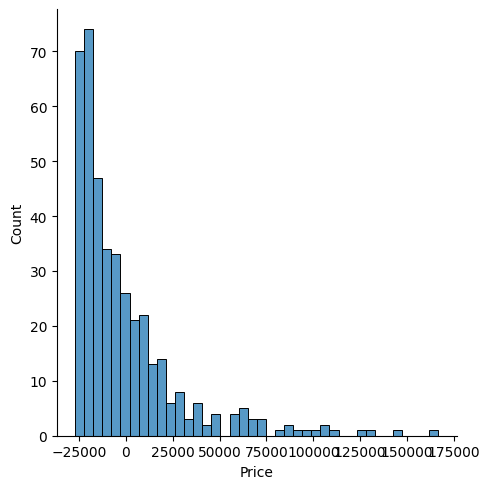

In [91]:
sns.displot(residual,bins=40)